In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import os
import pickle
import random
data_path = '../results/cluster_files/cifar100_notliving_trgt_b_clusters.pkl'

In [2]:
def get_data(data_file):
    data = pickle.load(open(data_file,'rb'))
    train_data = data['train']
    test_data = data['test']
    return (train_data, test_data)

In [3]:
train_data, test_data =  get_data(data_path)
epochs = train_data.keys()

In [4]:
def stack_data(in_dict):
    class_ids = sorted(in_dict.keys())
    class_idx = {x:ctr for ctr,x in enumerate(class_ids)}
    num_classes = len(class_ids) 

    data = [in_dict[x][0] for x in class_ids]
    labels = []
    for x in class_ids:
        num_samps, num_classes_orig = in_dict[x][1].shape
        label_array = np.zeros((num_samps, num_classes))
        curr_hot = class_idx[x]
        label_array[:,curr_hot] = 1
        labels.append(label_array)

    data = np.vstack(data)
    labels = np.vstack(labels)

    return data, labels

In [8]:
def show_eigenval_plot(S, epoch):

    fig, ax = plt.subplots(1,1,sharex=True)
    eig_list = list(S)
    ax.plot(eig_list,color = 'steelblue',marker="o")
    ax.set_xlabel('Eigenvectors')
    ax.set_ylabel('Eigenvalues')
    ax.set_title('Eigenvalues ar Epoch: ' + str(epoch))
    


In [9]:
def plot_eigen_vals(data):
    epochs = sorted(data.keys())
    for curr_epoch in epochs:
        curr_data, curr_labels = stack_data(data[curr_epoch])
        centered_data = curr_data - np.mean(curr_data)
        U, S, V = np.linalg.svd(centered_data, full_matrices=False)
        components = V
        coefficients = np.dot(U, np.diag(S))
        show_eigenval_plot(S, curr_epoch)

<ipython-input-8-841468dbb08a>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1,1,sharex=True)


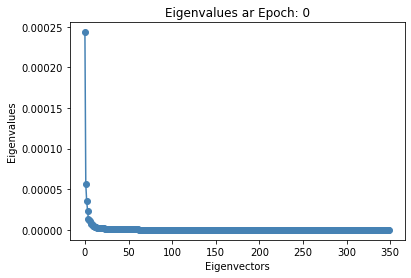

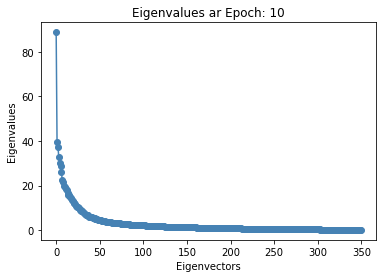

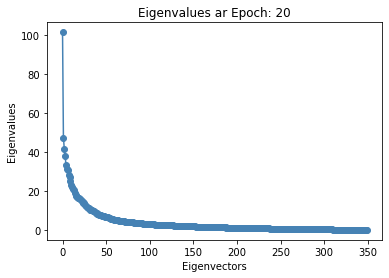

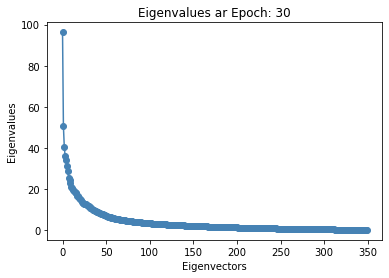

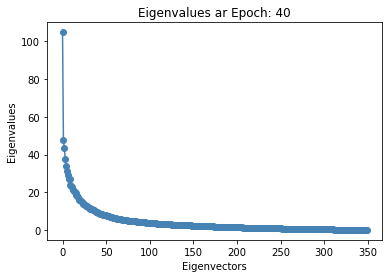

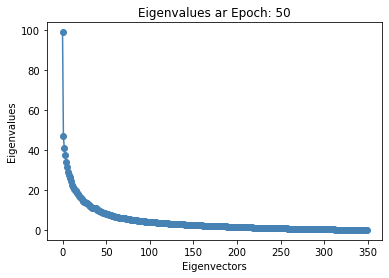

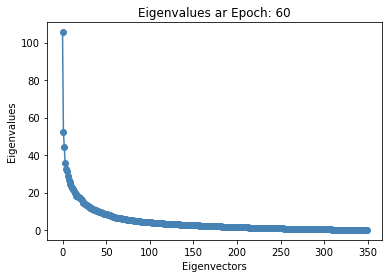

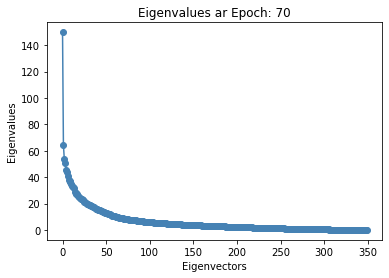

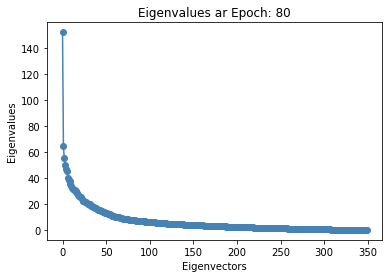

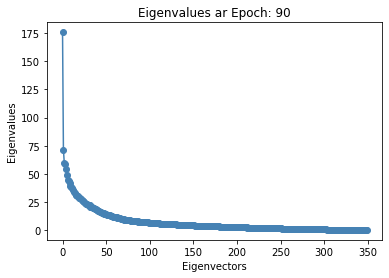

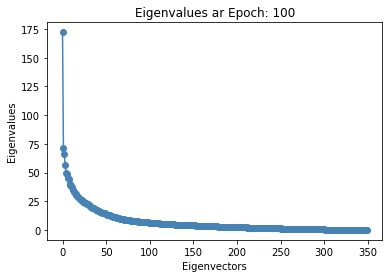

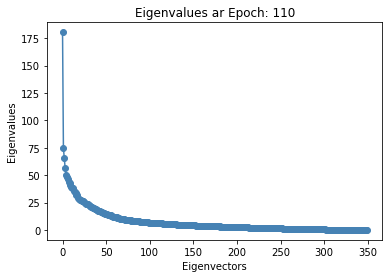

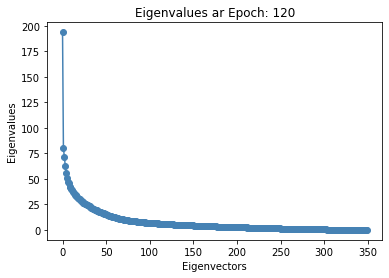

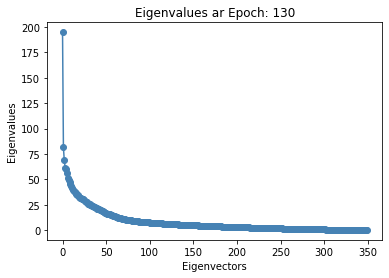

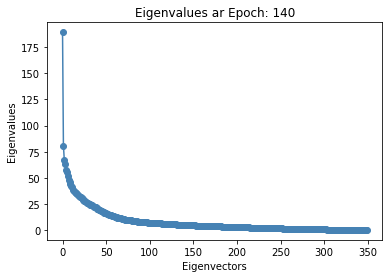

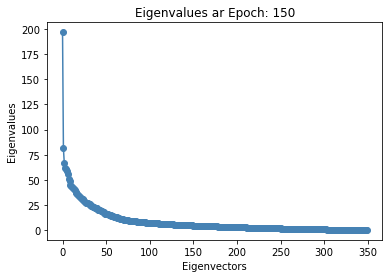

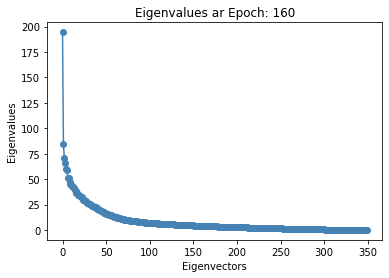

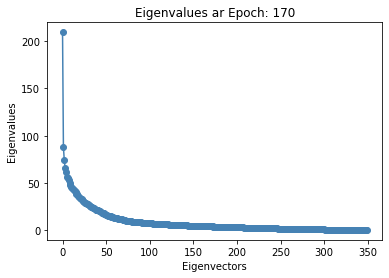

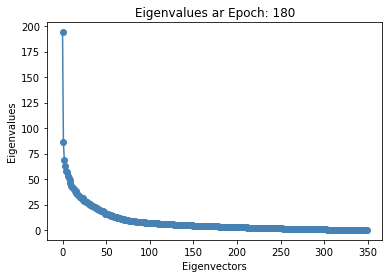

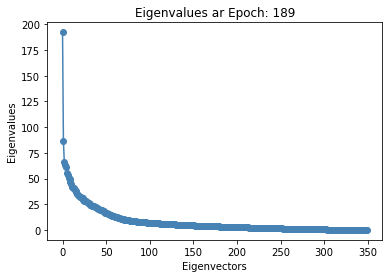

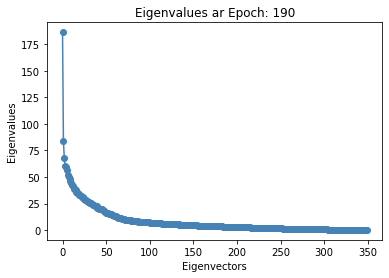

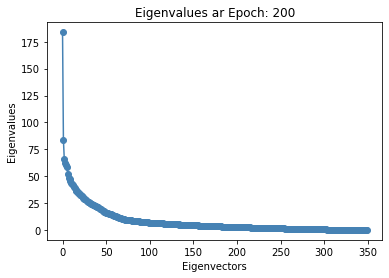

In [10]:
plot_eigen_vals(train_data)